# Story behind..
        There has been a revenue decline for the bank and they would like to know what actions to take. After investigation, it was found that the root cause is that their clients are not depositing as frequently as before. Term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can lend more and thus make more profits. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues.

   


# Variables:

    idUnique -identifier for each sample in the dataset. Cannot be used for modelling
    customer_age -Age of the Customer in years
    job_type - Type of job of the customer
    marital - Marital Status of the Custmer
    education - Education Level of the Customer
    default Whether - customer has Defaulted in Past
    balance Current - Balance in the Customer's Bank
    housing_loan - Has customer taken a Housing Loan
    personal_loan - Has customer taken a Personal Loan
    communication_type -Type of communication made by the bank with the customer
    day_of_month - Day of month of the last contact made with customer
    month -Month for the last contact made with customer
    last_contact_duration -Last Contact duration made with the customer (in seconds)
    num_contacts_in_campaign -Number of contacts made with the customer during the current campaign.
    days_since_prev_campaign_contact - Number of days passed since customer was contacted in previous campaign.
    num_contacts_prev_campaign -Number of contacts made with the customer during the previous campaign.
    prev_campaign_outcome -Success or Failure in previous Campaign.
    term_deposit_subscribed (Target) - Has the customer taken a term deposit ?
    
# Agenda:

    Brief look at data
    Data shape
    Traget distribution
    Variable datatypes
    Null values
    Unique values
    Separating categorical ans numerical columns
    Univariate analysis of Categorical features
    Bivariate analysis of Categorical features
    Univariate analysis of Numerical features
    Bivariate analysis of Numerical features

# Impoort All Required Labraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
train = pd.read_csv('Train_data.csv')
test = pd.read_csv('Test_1.csv')
train

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,id_27290,58.0,admin.,married,secondary,no,567.0,yes,no,cellular,2,feb,99.0,2.0,265.0,3,other,0
31643,id_20428,51.0,management,married,tertiary,no,1072.0,no,no,unknown,20,jun,31.0,7.0,NaN,0,unknown,0
31644,id_44679,41.0,unemployed,married,primary,no,242.0,yes,no,unknown,23,may,89.0,2.0,NaN,0,unknown,0
31645,id_4841,48.0,services,married,secondary,no,2699.0,no,no,cellular,11,aug,216.0,6.0,NaN,0,unknown,0


# Brief look at data

In [3]:
train.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0


In [4]:
test.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome
0,id_17231,55.0,retired,married,tertiary,no,7136.0,no,no,cellular,13,aug,90.0,2.0,NaN,0,unknown
1,id_34508,24.0,blue-collar,single,secondary,no,179.0,yes,no,cellular,18,may,63.0,2.0,NaN,0,unknown
2,id_44504,46.0,technician,divorced,secondary,no,143.0,no,no,cellular,8,jul,208.0,1.0,NaN,0,unknown
3,id_174,56.0,housemaid,single,unknown,no,6023.0,no,no,unknown,6,jun,34.0,1.0,NaN,0,unknown
4,id_2115,62.0,retired,married,secondary,no,2913.0,no,no,cellular,12,apr,127.0,1.0,188.0,1,success


# Dataset shape

In [5]:
id_col, target_col = 'id', 'term_deposit_subscribed'

In [6]:
print('Train contains',train.shape[0],'samples and ',train.shape[1],'variables')
print('Test contains',test.shape[0],'samples and ',test.shape[1],'variables')

features = [c for c in train.columns if c not in [id_col, target_col]]
print('There are',len(features),'number of features')

Train contains 31647 samples and  18 variables
Test contains 13564 samples and  17 variables
There are 16 number of features


# Traget distribution

# Normalize the data to get ratio instead of raw count

In [7]:

train[target_col].value_counts(normalize=True)

term_deposit_subscribed
0    0.892754
1    0.107246
Name: proportion, dtype: float64

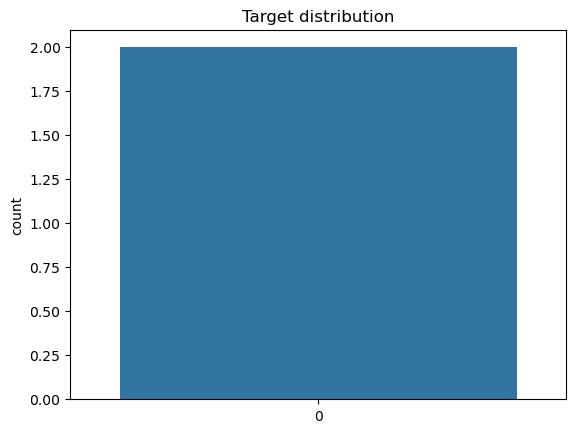

In [8]:
sns.countplot(train[target_col].value_counts(normalize=True))
plt.title('Target distribution')
plt.show()

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

# Null values

In [10]:
null_value_percentage = (train.isnull().sum()/train.shape[0])*100
null_value_percentage.sort_values(ascending = False)

days_since_prev_campaign_contact    81.622271
customer_age                         1.955952
balance                              1.260783
last_contact_duration                0.982716
marital                              0.473979
personal_loan                        0.470819
num_contacts_in_campaign             0.353904
id                                   0.000000
month                                0.000000
prev_campaign_outcome                0.000000
num_contacts_prev_campaign           0.000000
communication_type                   0.000000
day_of_month                         0.000000
housing_loan                         0.000000
default                              0.000000
education                            0.000000
job_type                             0.000000
term_deposit_subscribed              0.000000
dtype: float64

# Unique values


In [11]:
train.nunique()

id                                  31647
customer_age                           77
job_type                               12
marital                                 3
education                               4
default                                 2
balance                              6563
housing_loan                            2
personal_loan                           2
communication_type                      3
day_of_month                           31
month                                  12
last_contact_duration                1447
num_contacts_in_campaign               46
days_since_prev_campaign_contact      511
num_contacts_prev_campaign             41
prev_campaign_outcome                   4
term_deposit_subscribed                 2
dtype: int64

In [14]:
#looping through the columns
#check if datatype is object('O')
#if yes add to list
cat_cols = [train.columns[i] 
            for i in range(1, train.shape[1]-1)  
            if train.iloc[:,i].dtype=='O']
cat_cols

['job_type',
 'marital',
 'education',
 'default',
 'housing_loan',
 'personal_loan',
 'communication_type',
 'month',
 'prev_campaign_outcome']

In [15]:
num_cols = [c for c in features if c not in cat_cols]
num_cols

['customer_age',
 'balance',
 'day_of_month',
 'last_contact_duration',
 'num_contacts_in_campaign',
 'days_since_prev_campaign_contact',
 'num_contacts_prev_campaign']

Univariate analysis of Categorical features
Pick one variable one at a time and analyse individually like frequency, distribution etc.

# 1. Pie chart to see propotion of samples

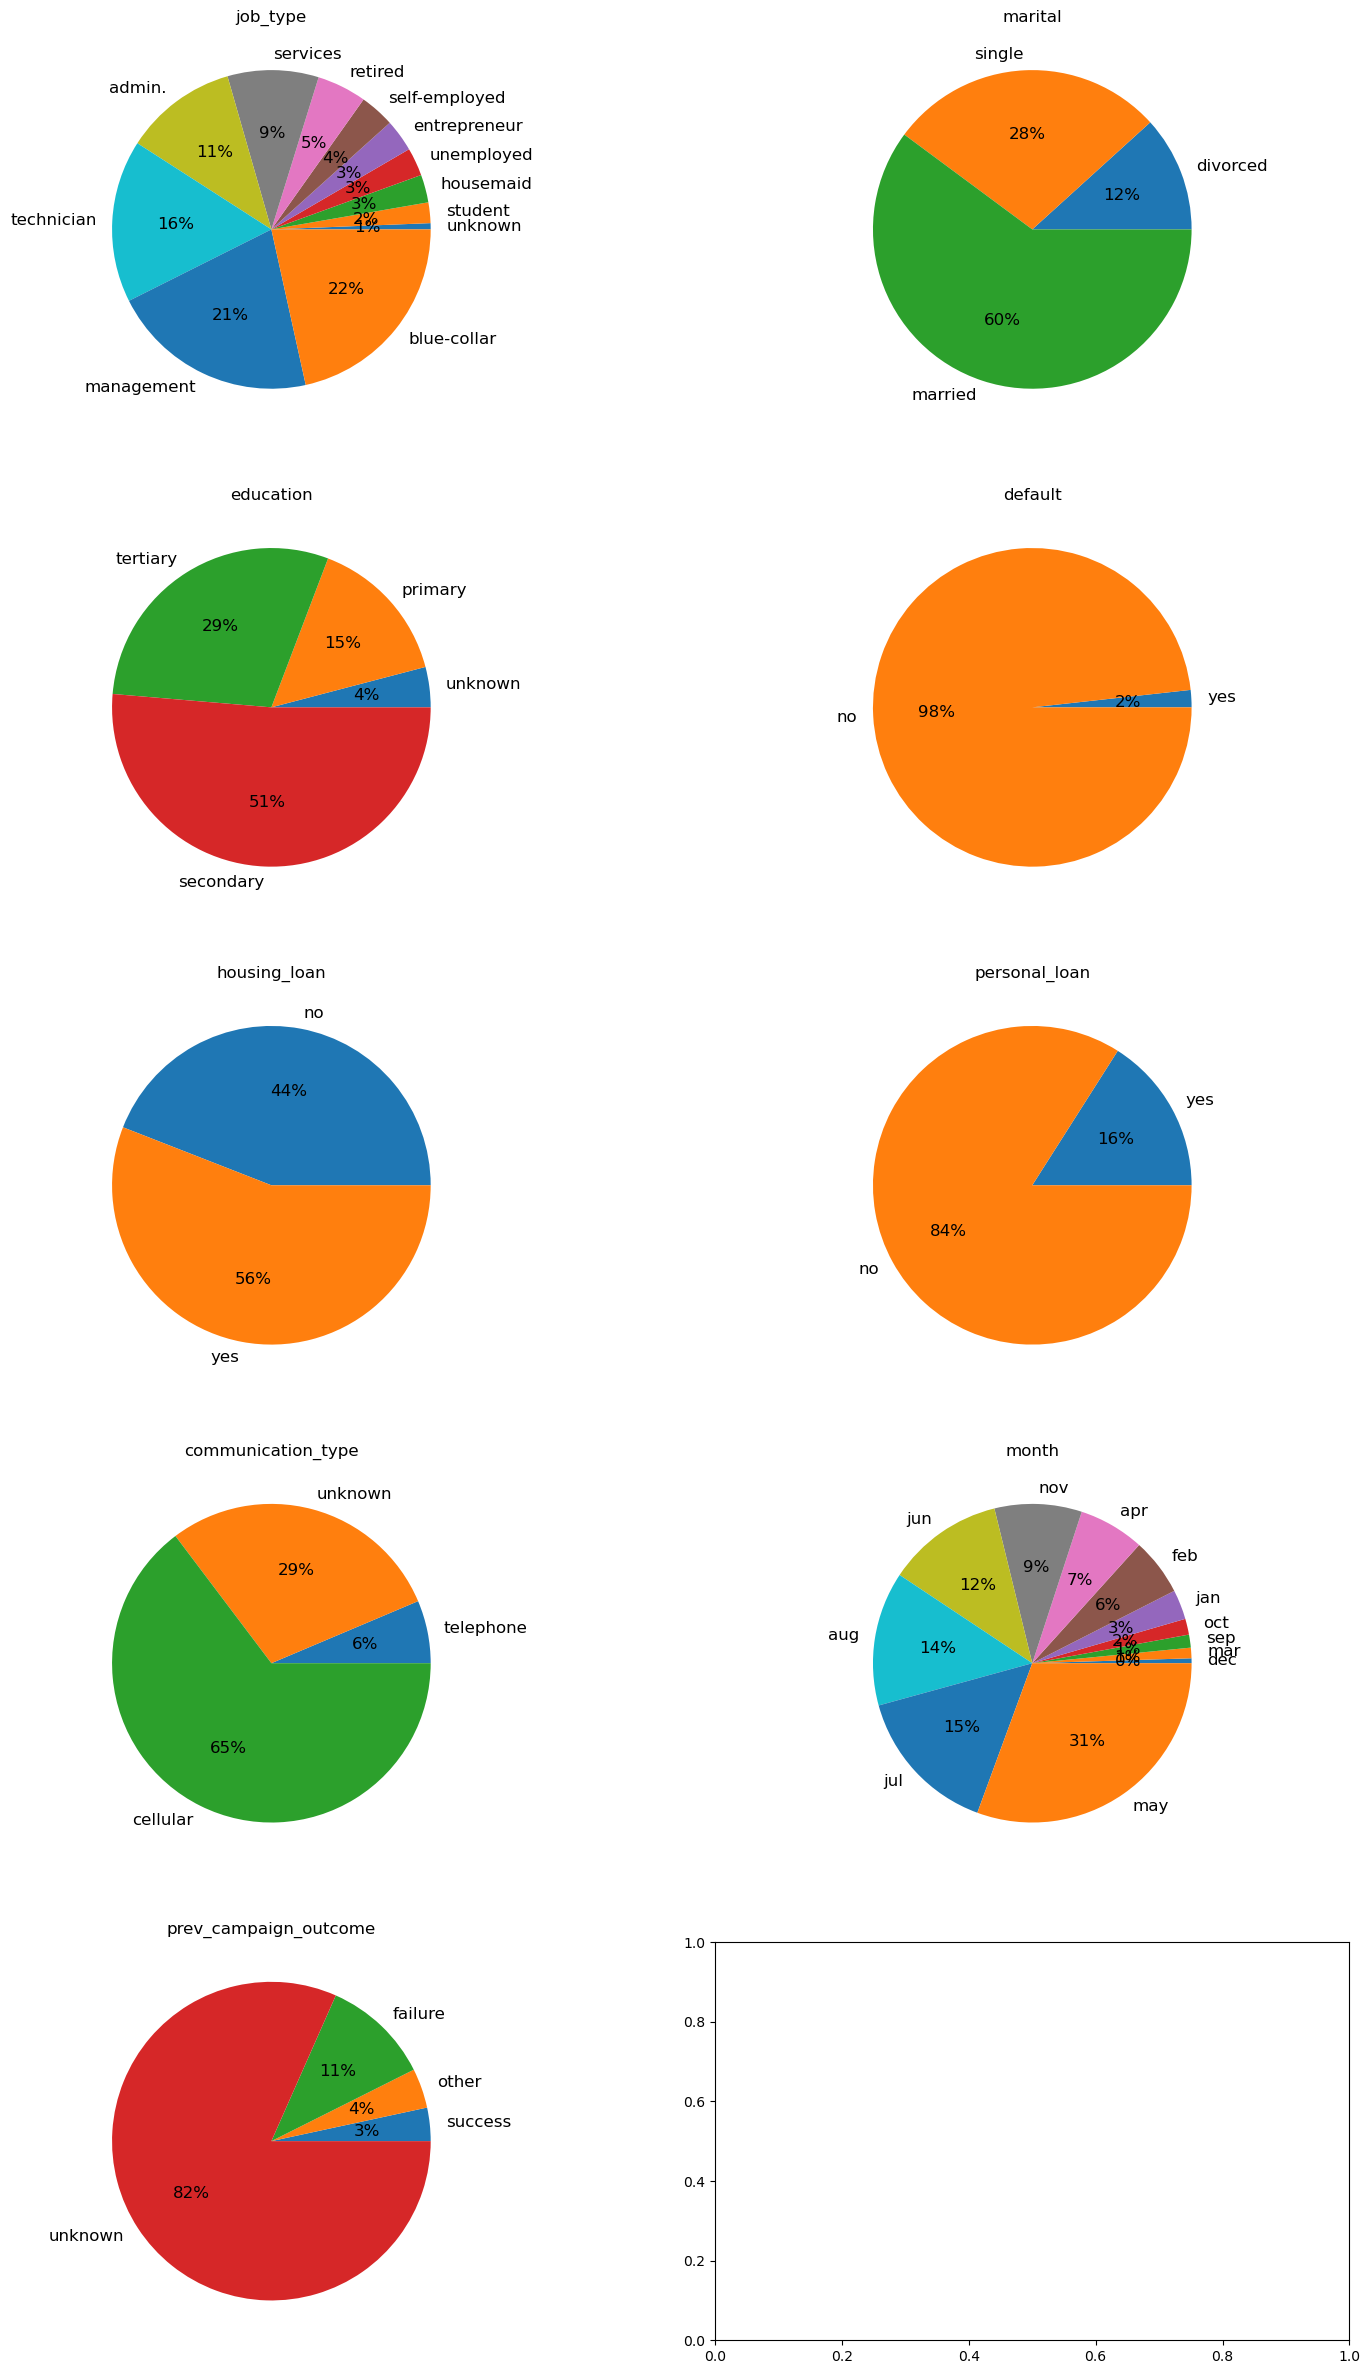

In [17]:
fig, axes = plt.subplots(5, 2, figsize=(18,30))
axes = [ax for axes_rows in axes for ax in axes_rows]

for i, c in enumerate(train[cat_cols]):
    train[c].value_counts()[::-1].plot(kind='pie',
                                          ax=axes[i],
                                          title=c,
                                          autopct='%.0f%%',
                                          fontsize=12)
    axes[i].set_ylabel('')

# 2. Bar plot to see frequency

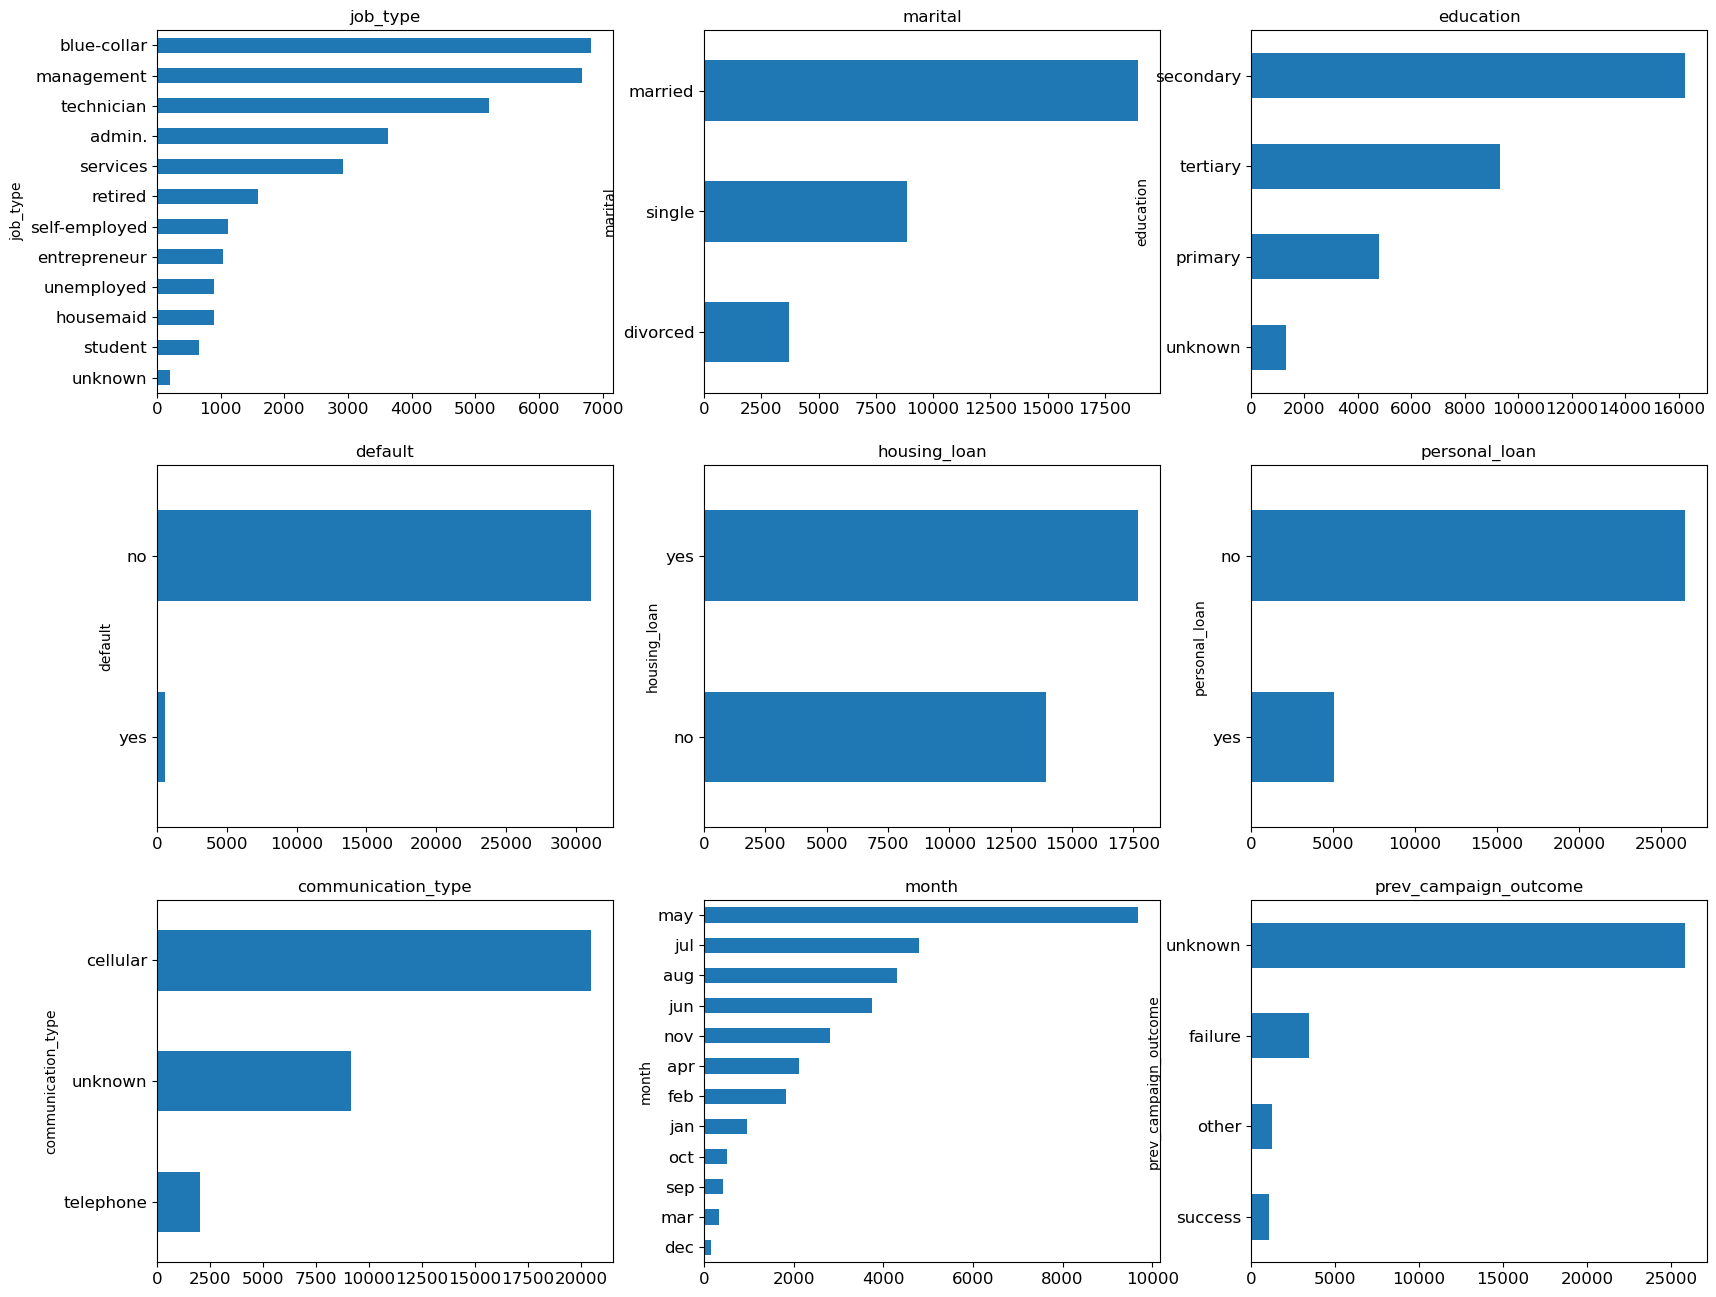

In [18]:


fig, axes = plt.subplots(3, 3, figsize=(20,16))
axes = [ax for axes_rows in axes for ax in axes_rows]

for i, c in enumerate(train[cat_cols]):
    train[c].value_counts()[::-1].plot(kind='barh',
                                          ax=axes[i],
                                          title=c,
                                          fontsize=12)

Observations

    Less number of students and more number of management and technician customers
    Most of married customers
    Most customers education levels is secondary
    Most cutomers are not defaulted in past
    More than 50% have taken housing loan
    Nearly 85% have taken personal loan
    Major communication type is cellular
    Most of the customers were last contacted in the month of May
    Most customers where not contacted in previous month
    Bivariate analysis of Categorical features
    Check relationship of each variable with the target variable.

In [52]:
vc_a

,count,proportion,term_deposit_subscribed
0,blue-collar,0.225215,0
1,management,0.206031,0
2,technician,0.166389,0
3,admin.,0.114926,0
4,services,0.095282,0
5,retired,0.044102,0
6,self-employed,0.034722,0
7,entrepreneur,0.034014,0
8,housemaid,0.029023,0
9,unemployed,0.027006,0


In [33]:
vc_b

,count,proportion,term_deposit_subscribed
0,management,0.248969,1
1,technician,0.152917,1
2,blue-collar,0.133471,1
3,admin.,0.111962,1
4,retired,0.101650,1
5,services,0.068061,1
6,student,0.052740,1
7,unemployed,0.040660,1
8,self-employed,0.038303,1
9,entrepreneur,0.022392,1


In [34]:
df

,count,proportion,term_deposit_subscribed
0,blue-collar,0.225215,0
1,management,0.206031,0
2,technician,0.166389,0
3,admin.,0.114926,0
4,services,0.095282,0
5,retired,0.044102,0
6,self-employed,0.034722,0
7,entrepreneur,0.034014,0
8,housemaid,0.029023,0
9,unemployed,0.027006,0


# Univariate analysis of Numerical features

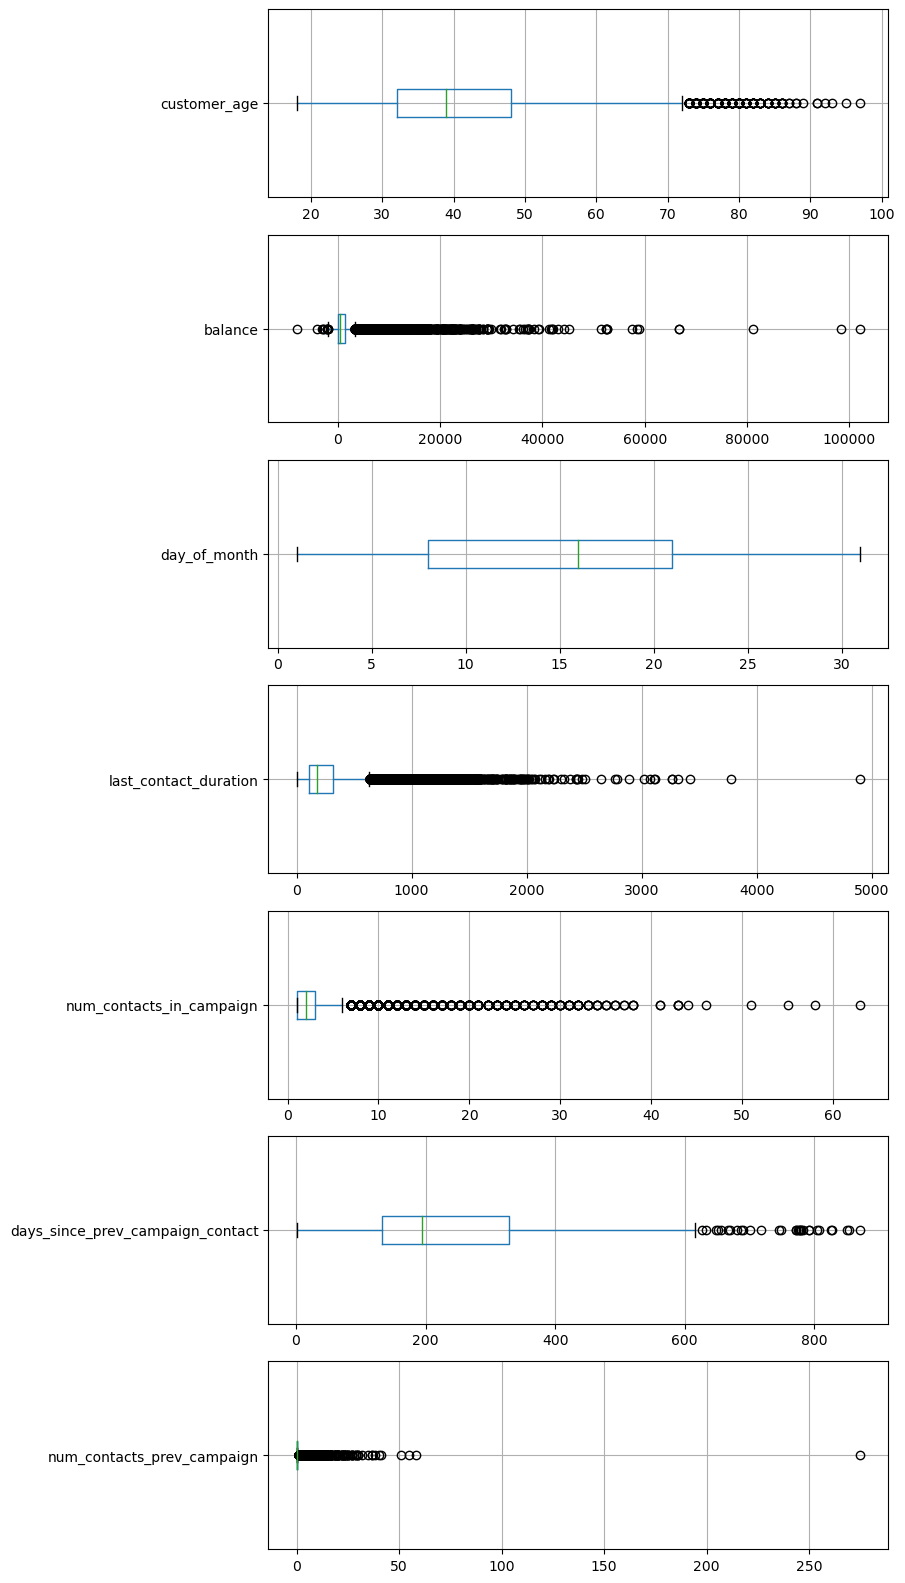

In [36]:
fig, axes = plt.subplots(7,1,figsize=(8,20))
for i,c in enumerate(train[num_cols]):
    train[[c]].boxplot(ax=axes[i], vert=False)

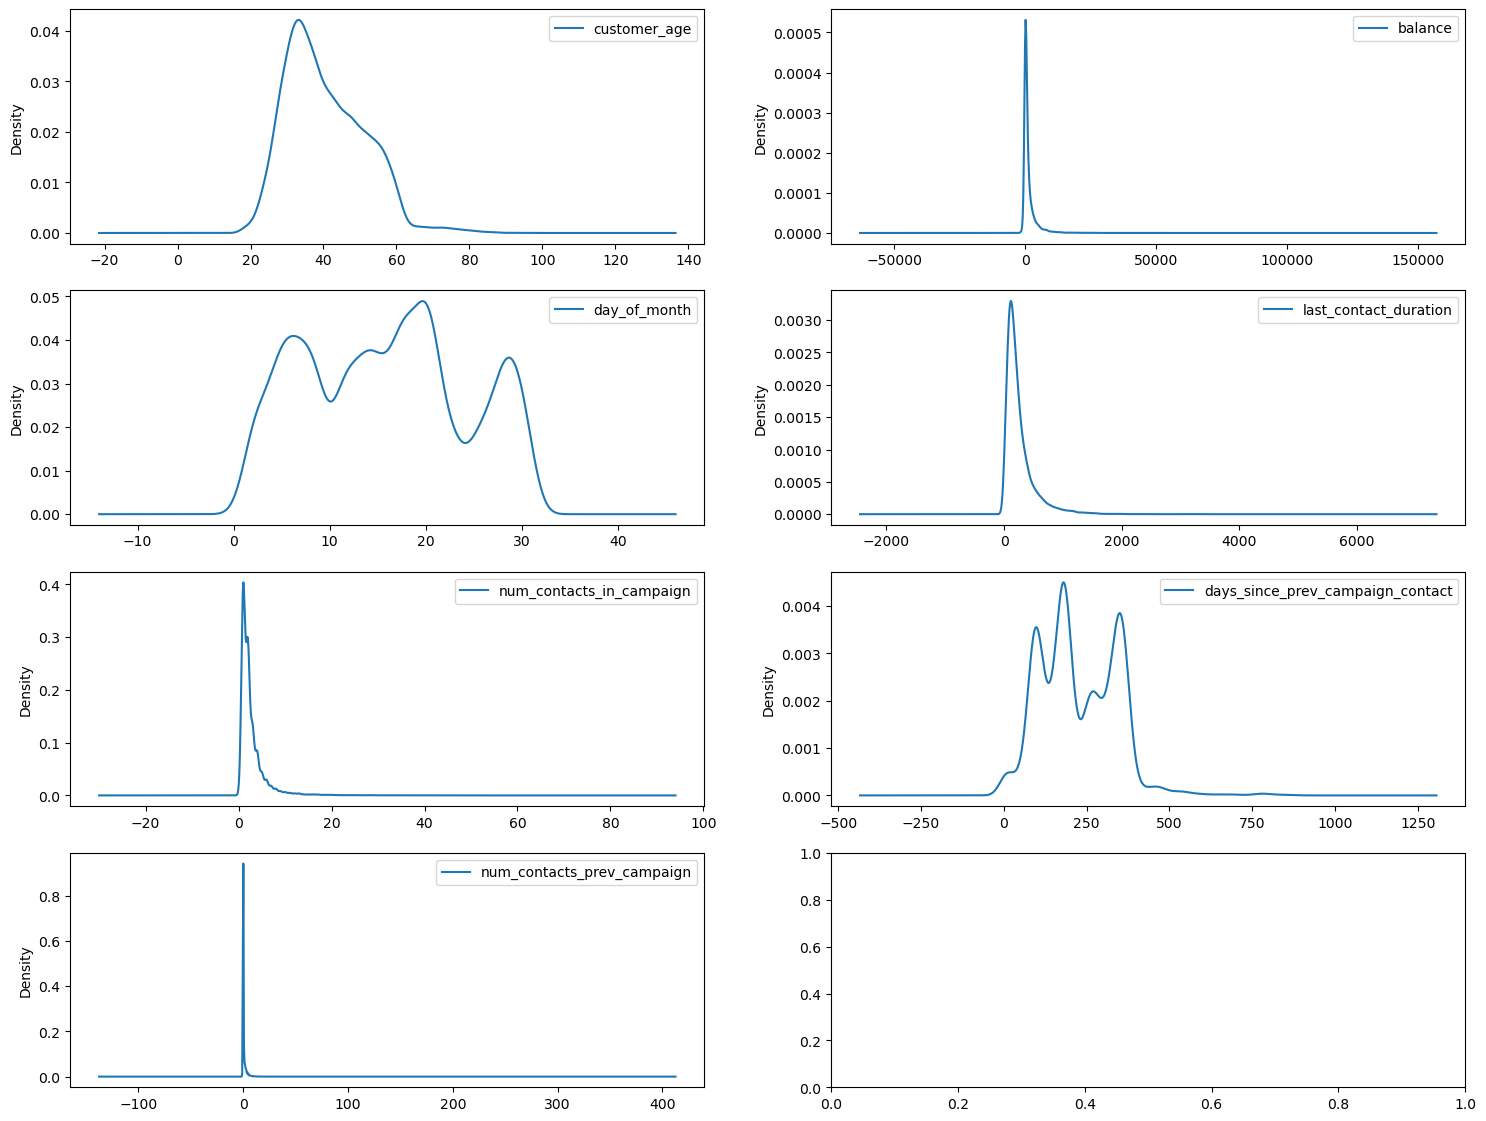

In [37]:
#We can see many of the features have lot of outliers. Let's see distrubution

fig, axes = plt.subplots(4, 2, figsize=(18,14))
axes = [ax for axes_rows in axes for ax in axes_rows]

for i, c in enumerate(num_cols):
    plot = train[[c]].plot(kind='kde', ax=axes[i])

Bivariate analysis of Numerical features
Let us plot median of the numerical values. Why not mean? because we have already seen there are many outliers and mean is very much influenced by outliers

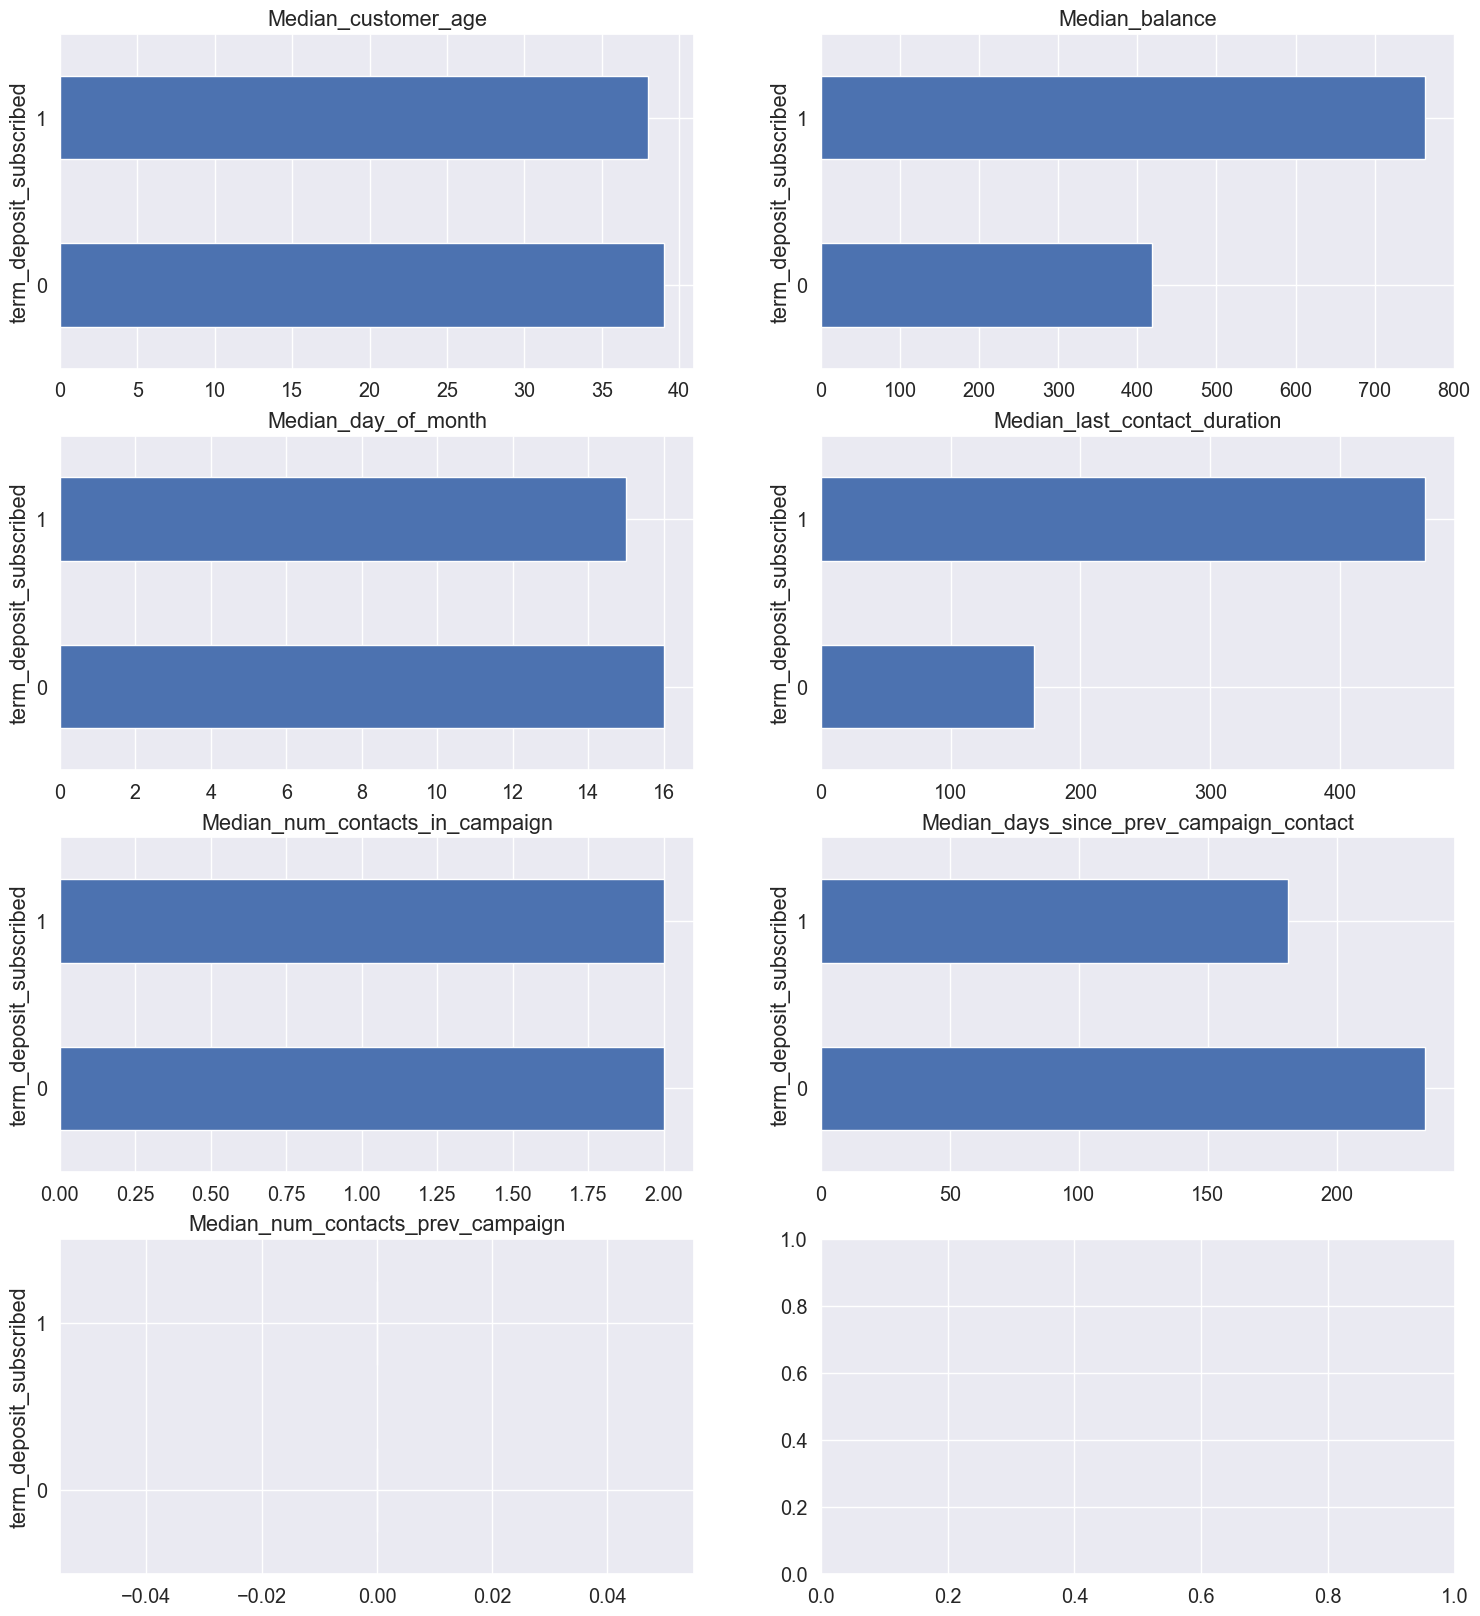

In [38]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(4, 2, figsize=(18, 20))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(num_cols):
    train.groupby(target_col)[c].median().plot(kind = 'barh', title=f'Median_{c}', ax=axes[i])

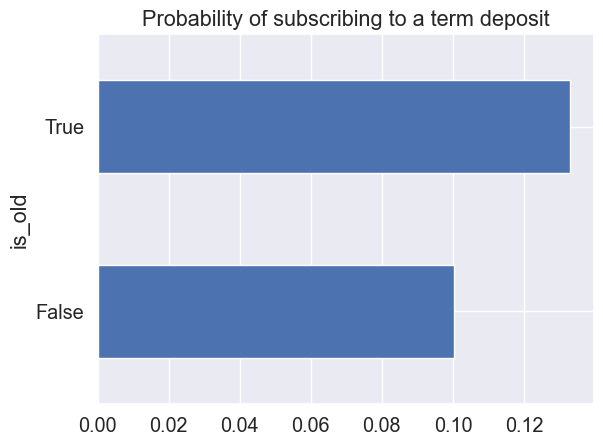

In [40]:
#create a new column called is_old and fill with true
train['is_old'] = True

#in each row see of age is less 50
#if yes make old_age value as False fo that row
train.loc[train['customer_age'] <= 50, 'is_old'] = False

#group by old_age and plot the count
_ = train.groupby('is_old')[target_col].mean().sort_values().plot(kind = 'barh', title='Probability of subscribing to a term deposit')

In [41]:
#old_age column is no longer needed
train=train.drop(['is_old'],axis=1)

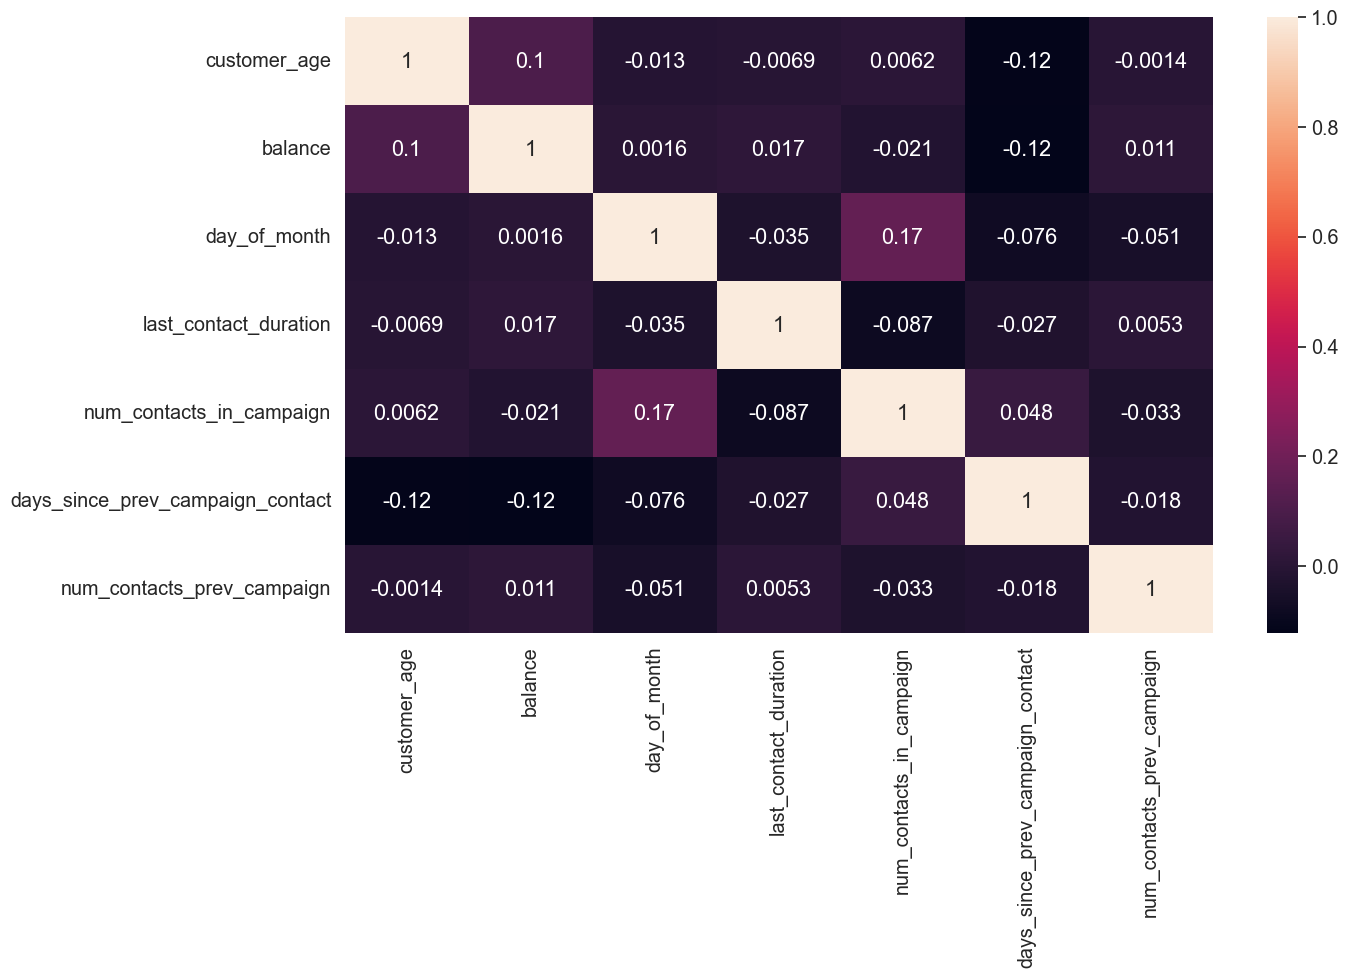

In [42]:
#Let's check corelation

plt.figure(figsize=(14, 8))
_ = sns.heatmap(train[num_cols].corr(), annot=True)

# Thank you